In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'absth',
            'wgt',
            'planck_wgt_flux']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band01_wn_10_340',
                          'ng_30',
                          'g_descending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_10',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.7__all.7',
                          'dgs',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band01_wn_10_340',
                          'ng_30',
                          'g_descending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_10',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.7__all.7',
                          'dgs',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 30 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 10

nband = 330

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_1 = 1.

temperature_reference_1 = 250.

pressure_reference_2 = 200.

temperature_reference_2 = 250.

ighigh = 10

ng = 30

data absth(:, 1) /

!     thresholds for reference (P, T) low
!     data absth(:, 2) /

data wgt
     &     /30 * .7/

planck_wgt_flux = .true.

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

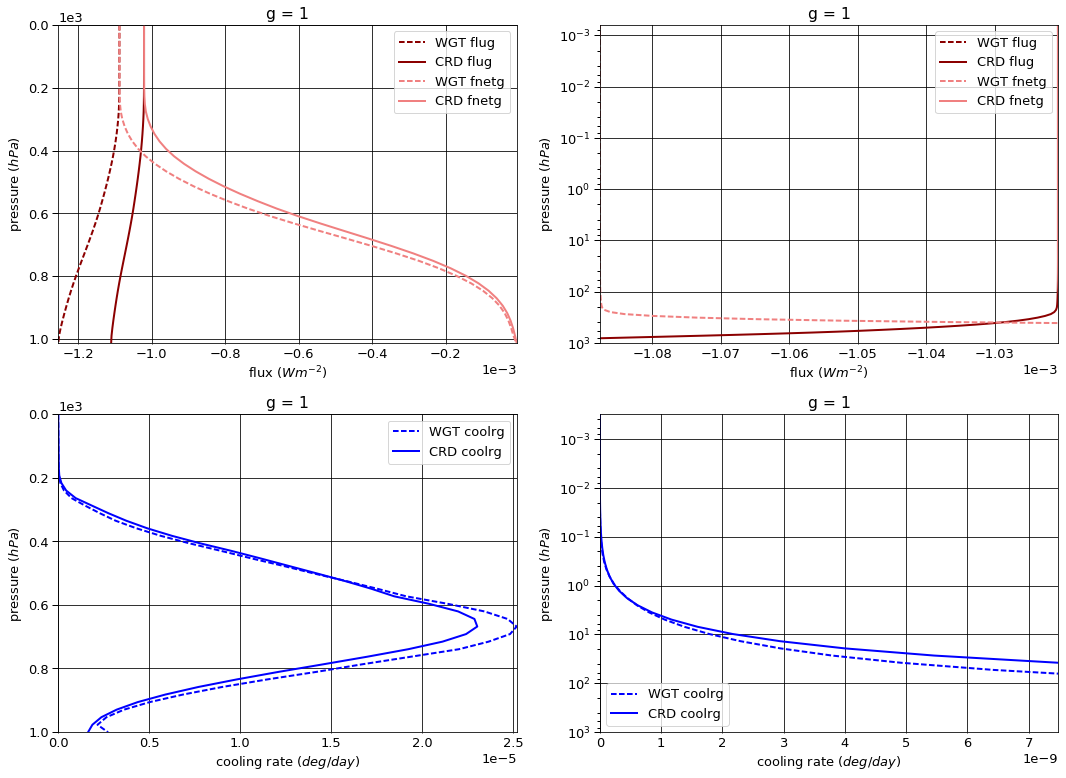

# Figure: flux, cooling rate g-group 2

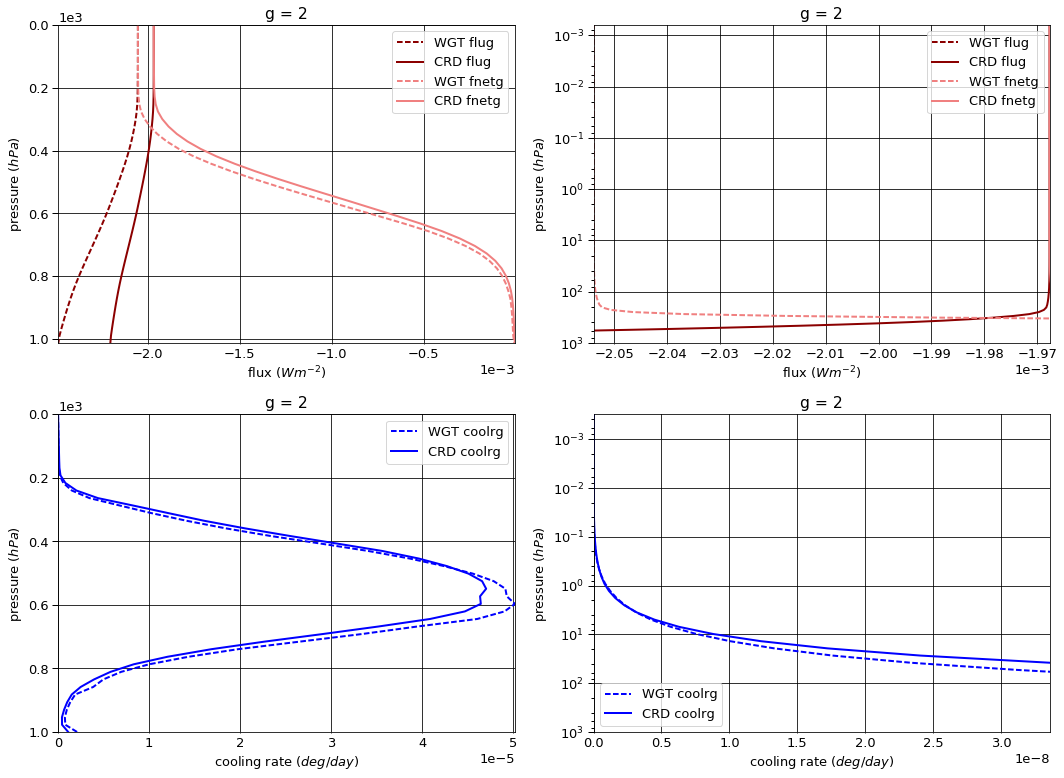

# Figure: flux, cooling rate g-group 3

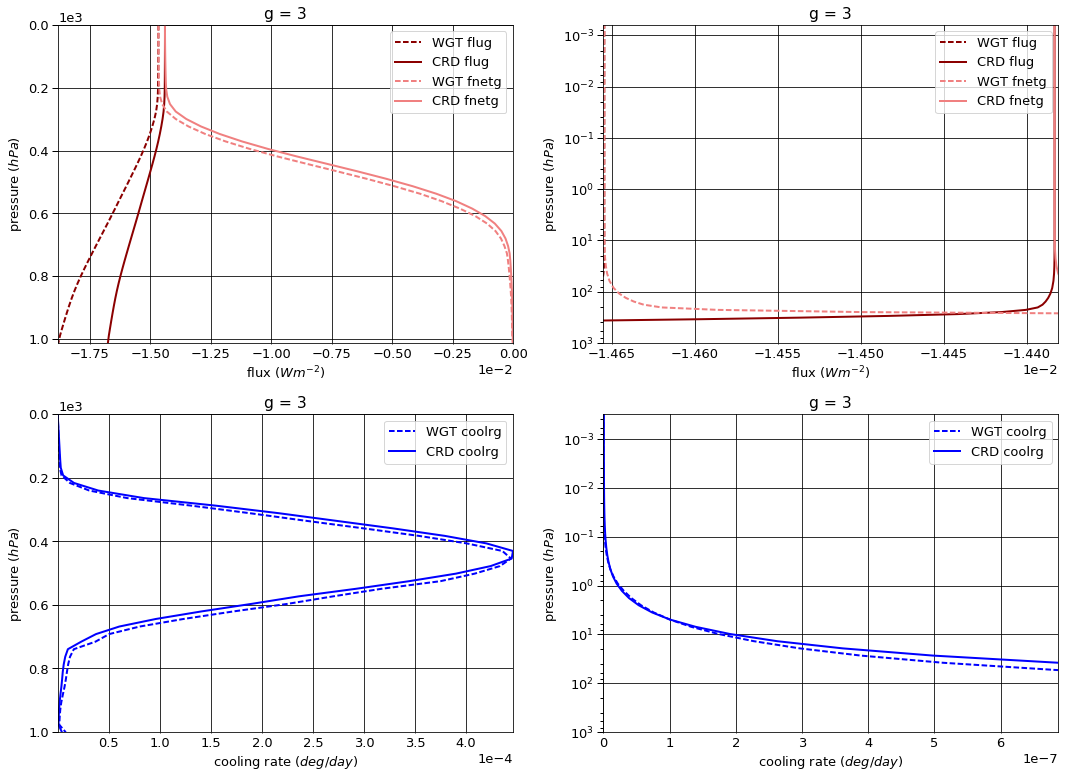

# Figure: flux, cooling rate g-group 4

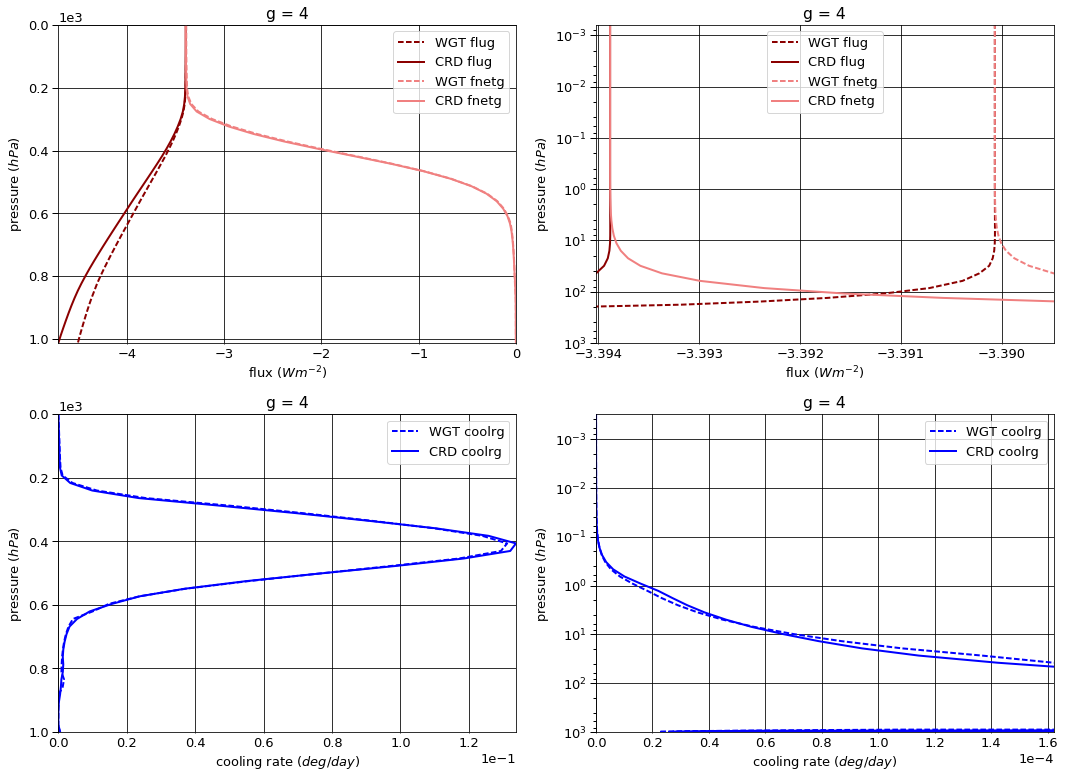

# Figure: flux, cooling rate g-group 5

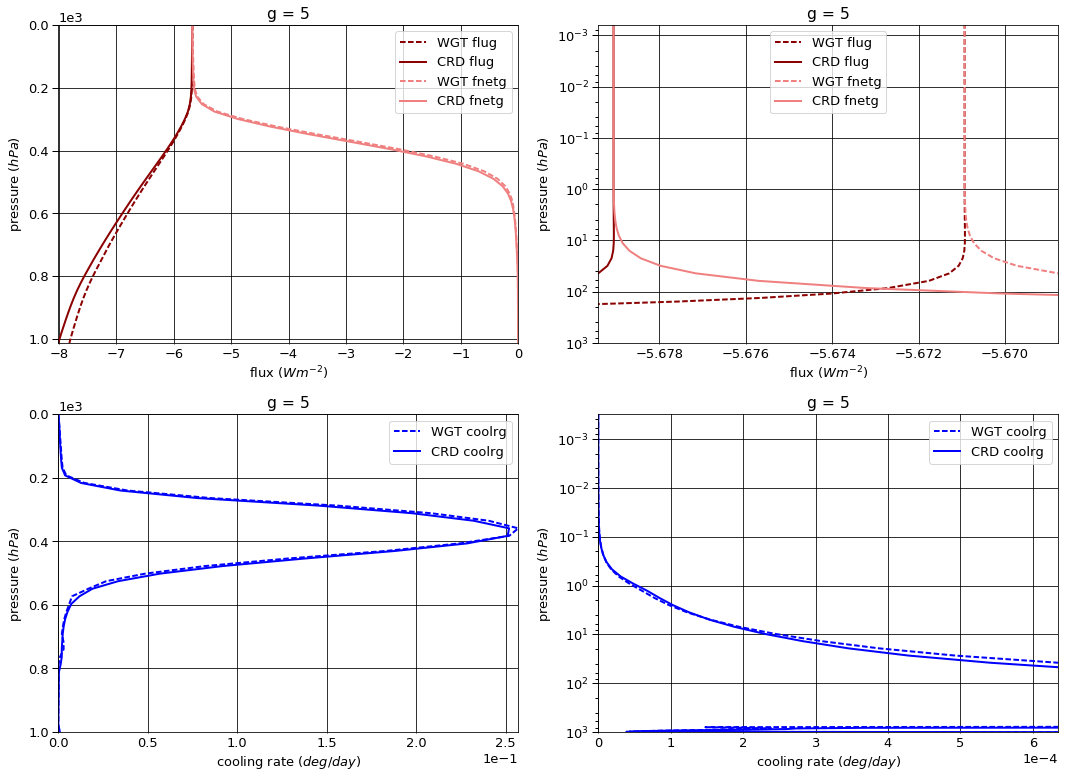

# Figure: flux, cooling rate g-group 6

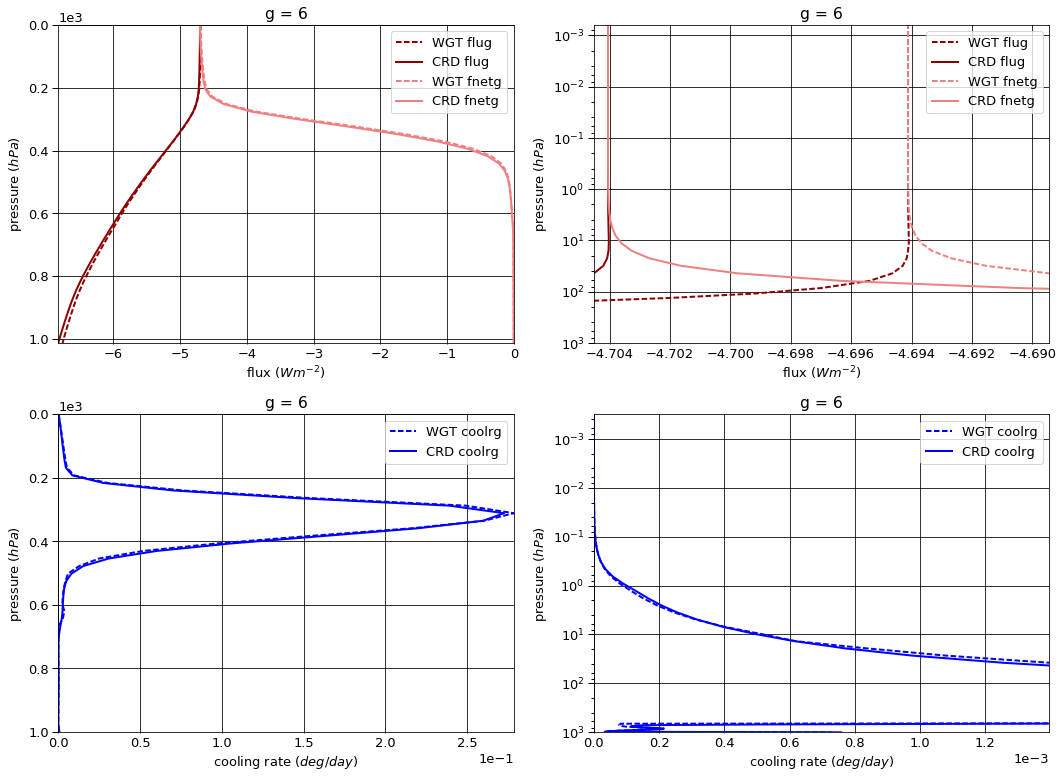

# Figure: flux, cooling rate g-group 7

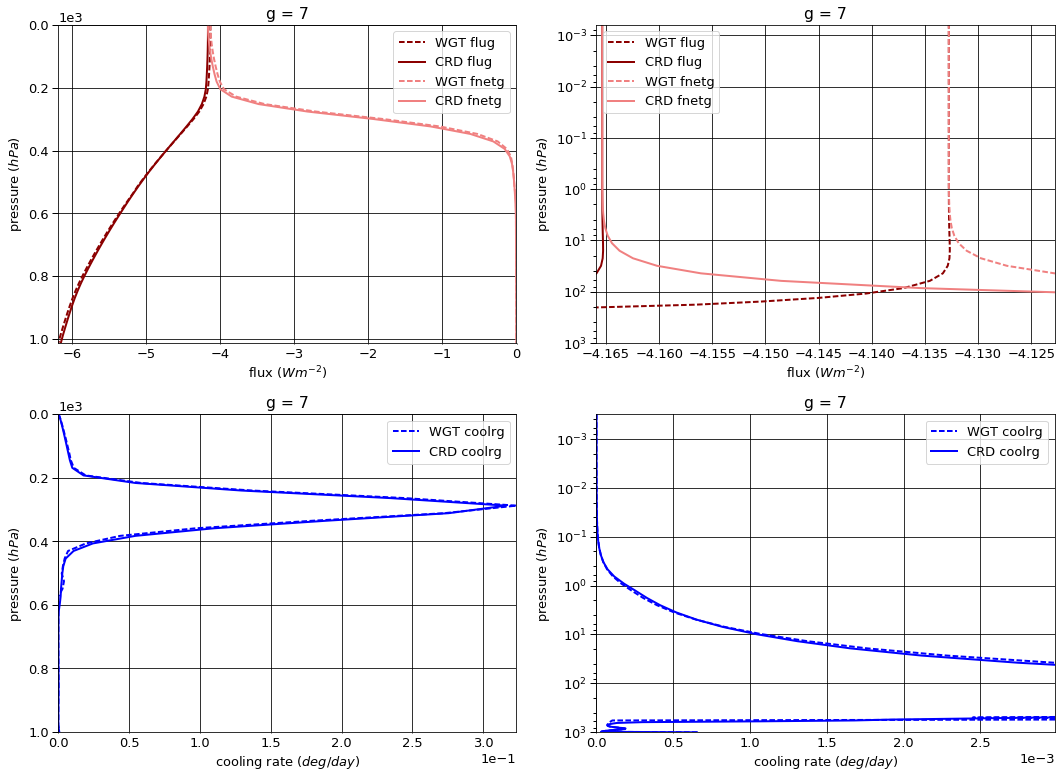

# Figure: flux, cooling rate g-group 8

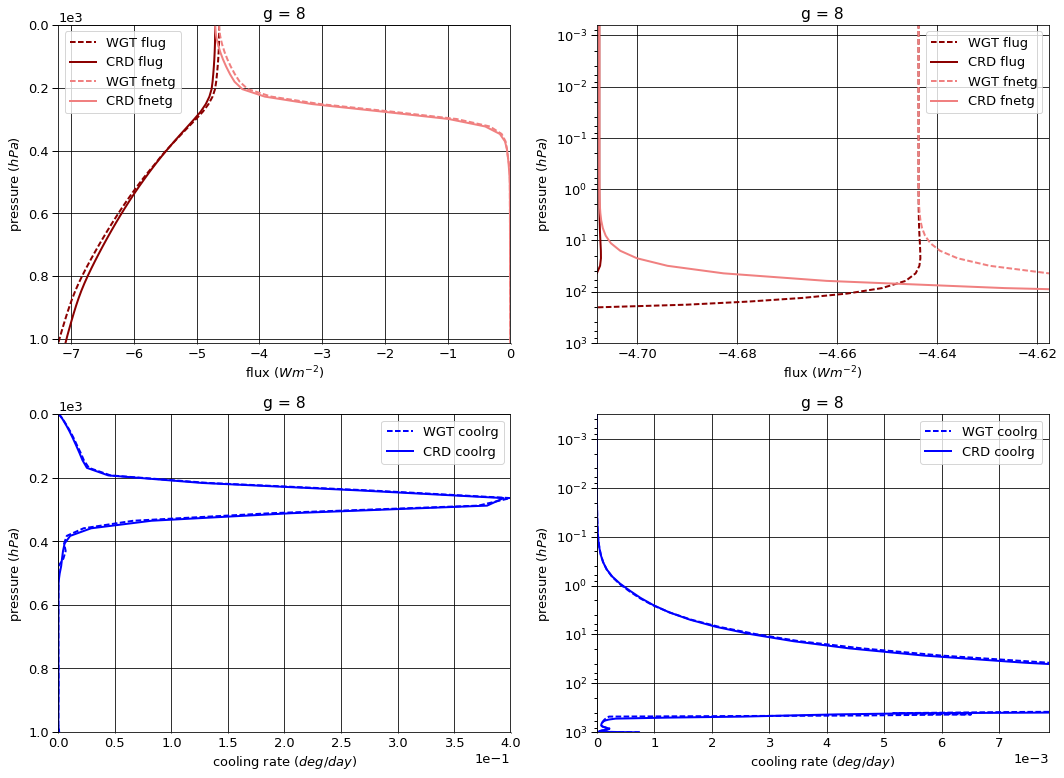

# Figure: flux, cooling rate g-group 9

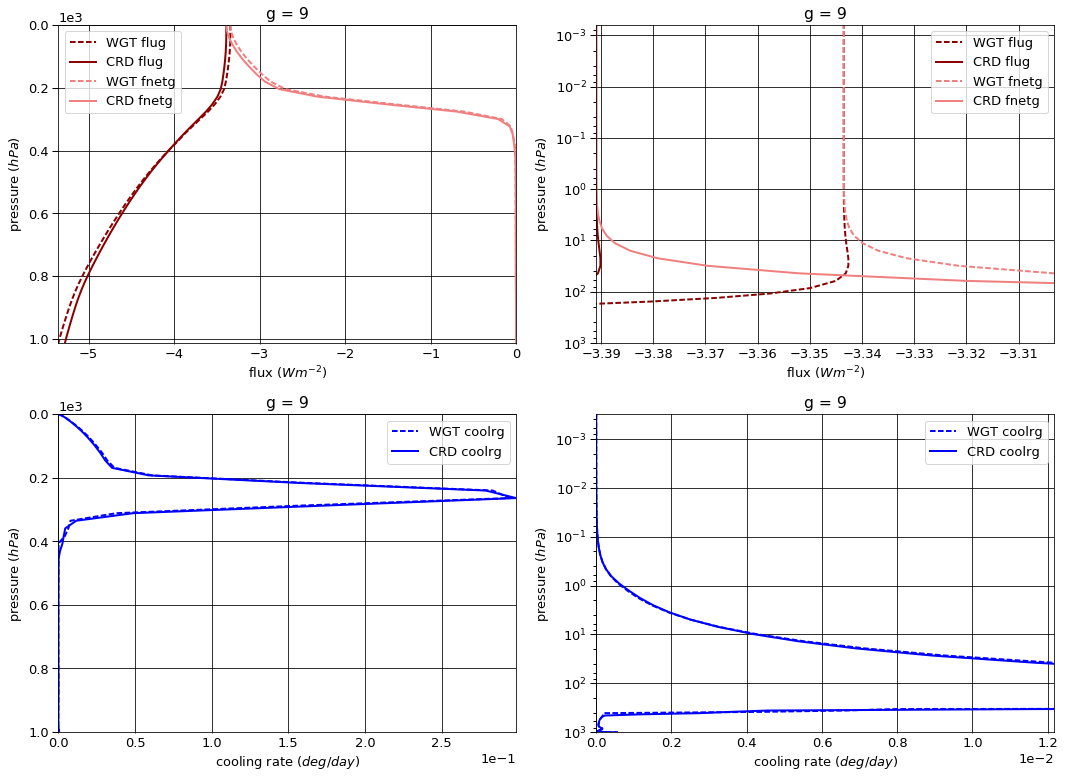

# Figure: flux, cooling rate g-group 10

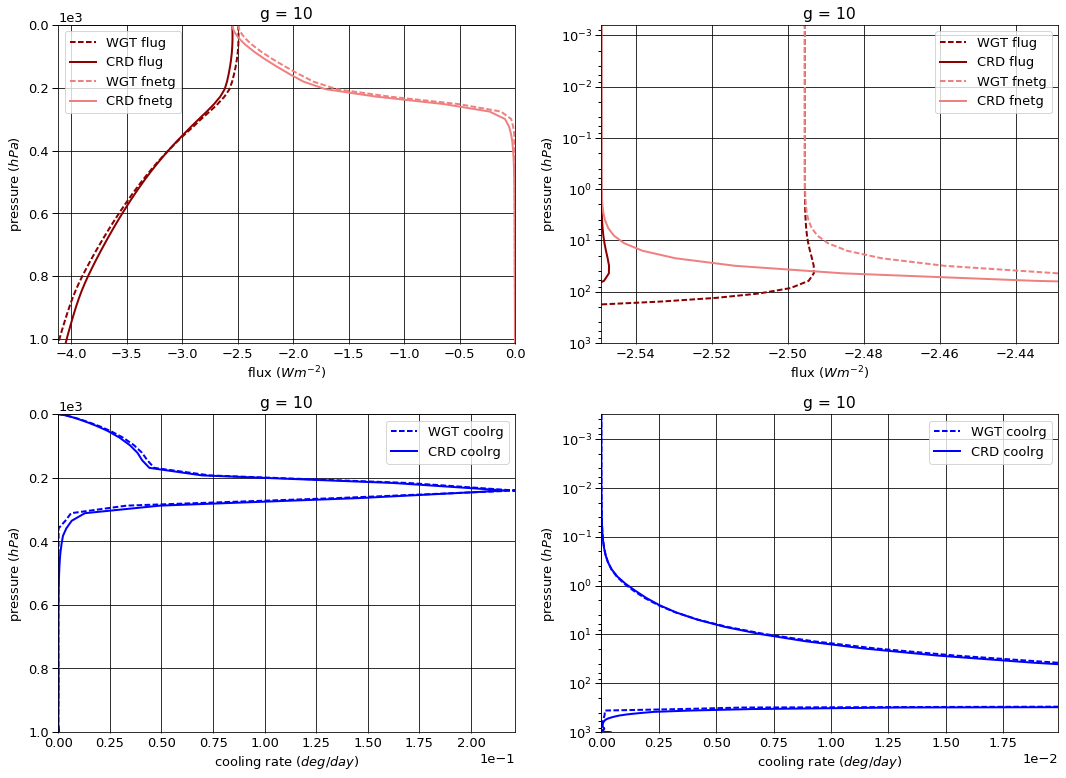

# Figure: flux, cooling rate g-group 11

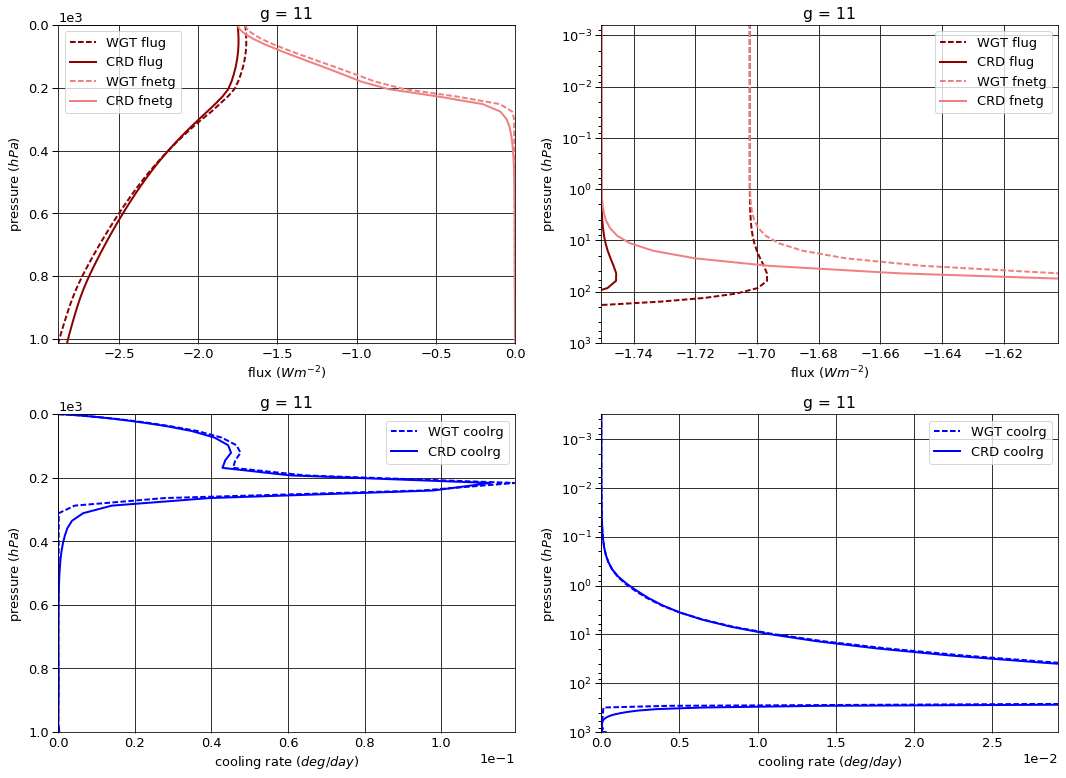

# Figure: flux, cooling rate g-group 12

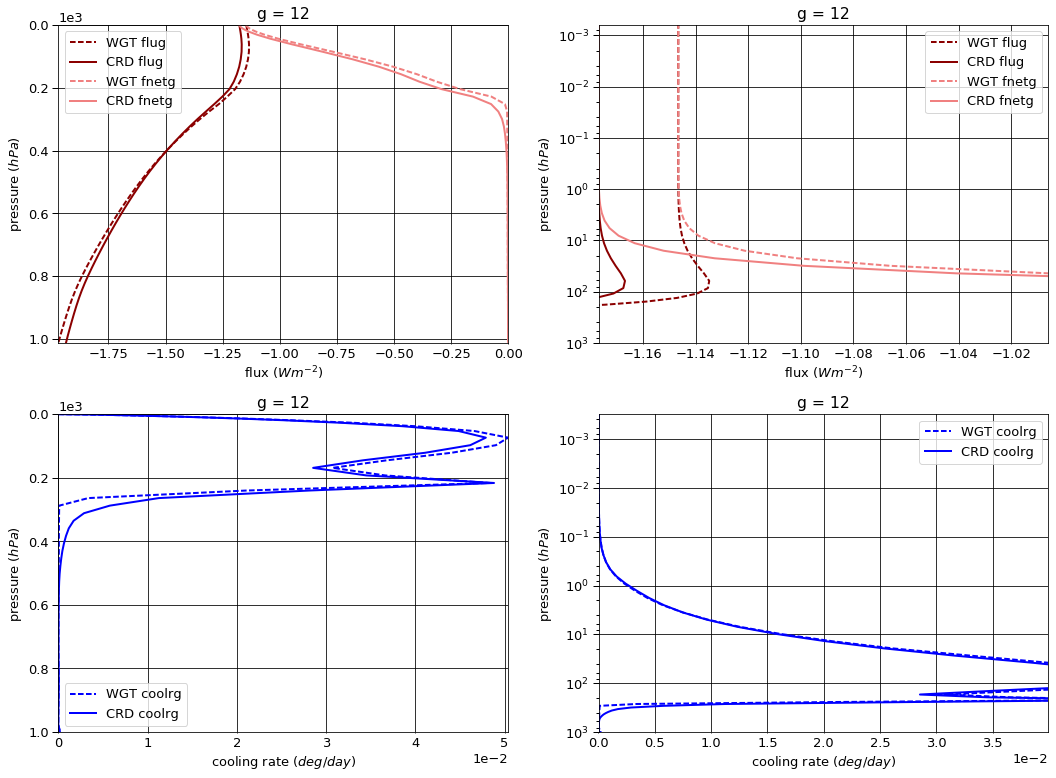

# Figure: flux, cooling rate g-group 13

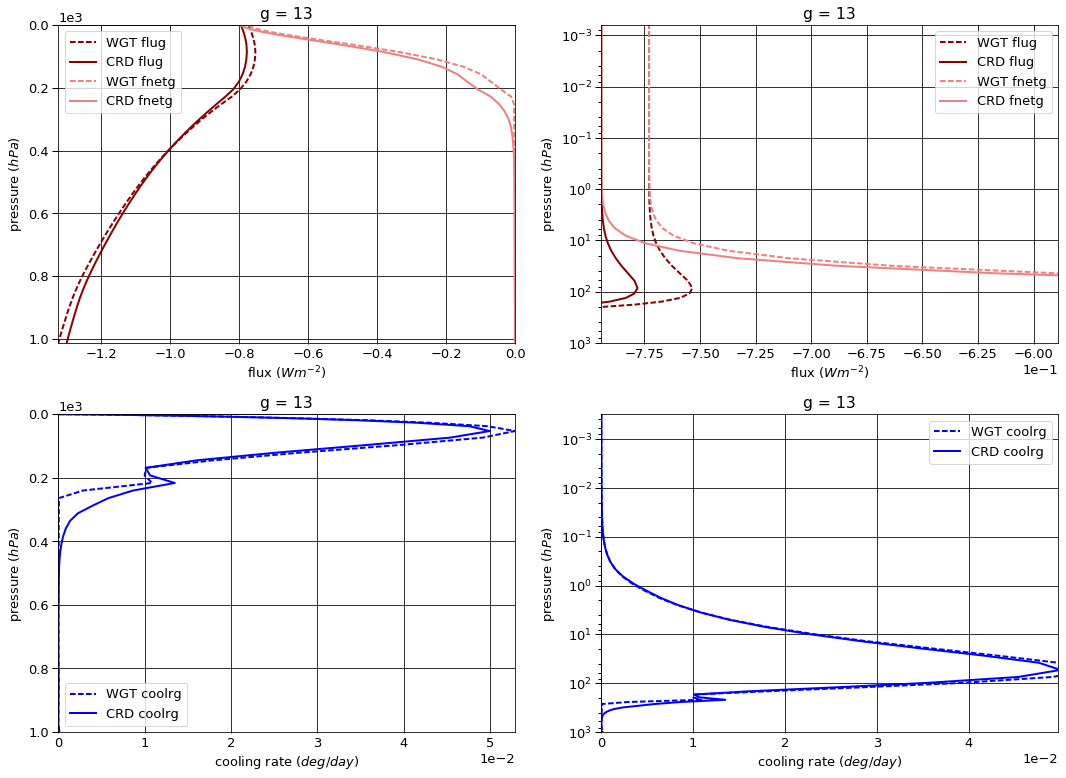

# Figure: flux, cooling rate g-group 14

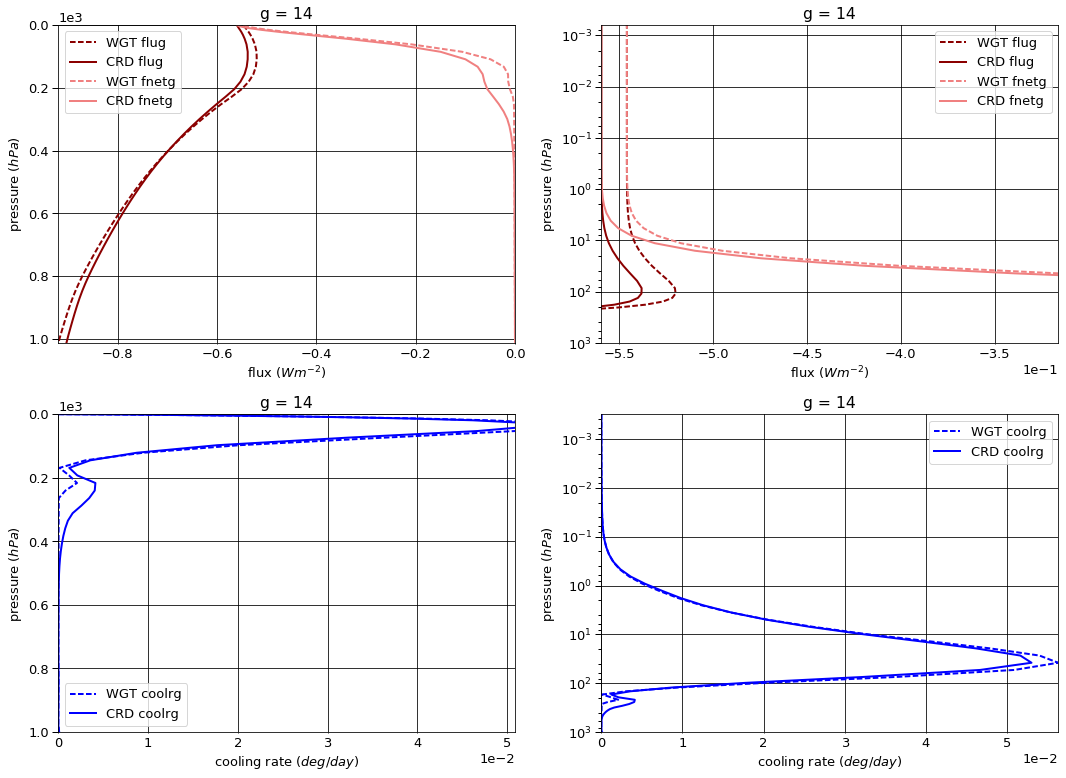

# Figure: flux, cooling rate g-group 15

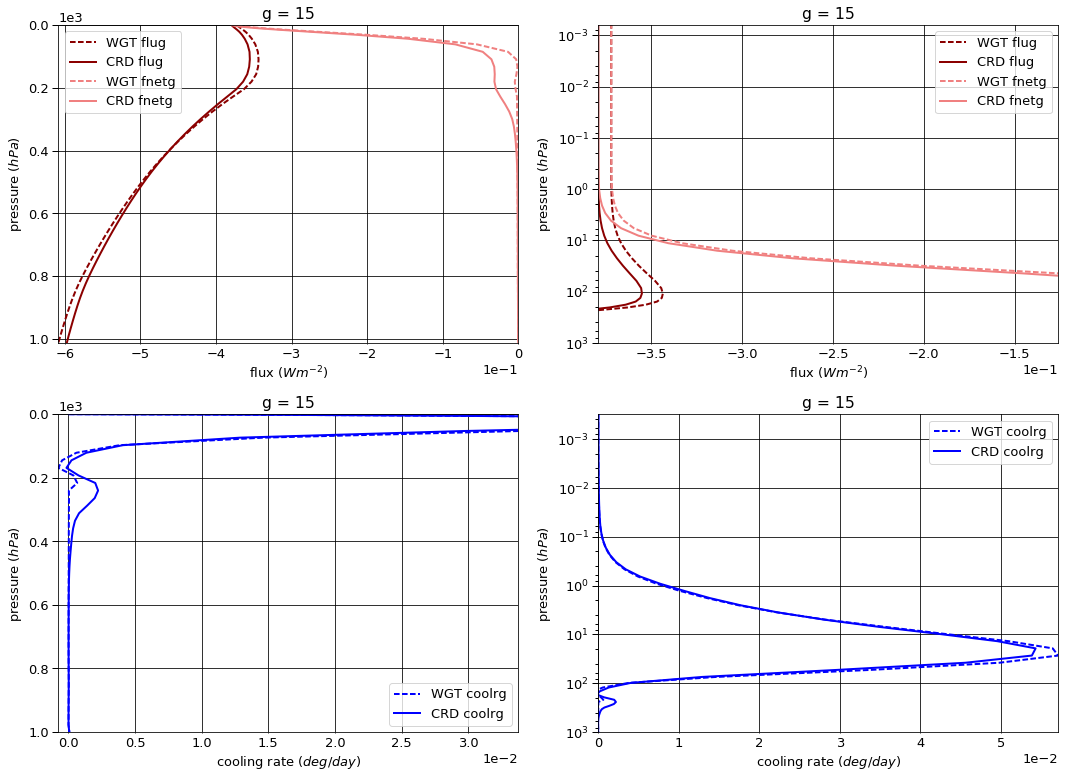

# Figure: flux, cooling rate g-group 16

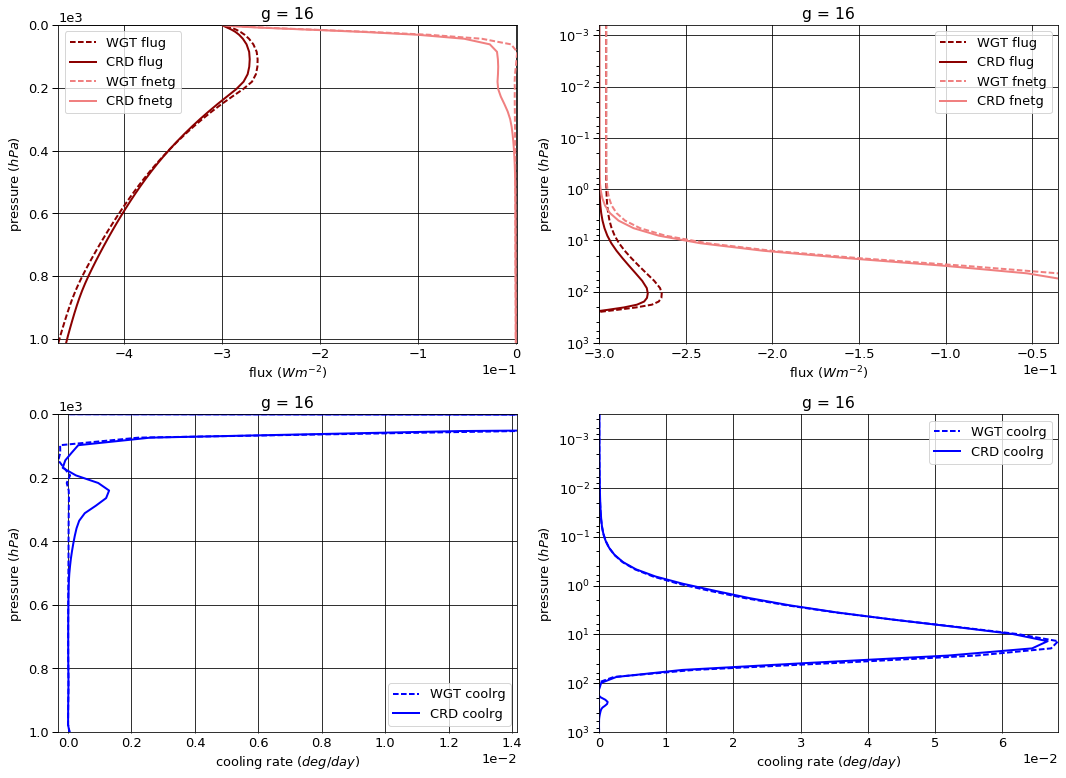

# Figure: flux, cooling rate g-group 17

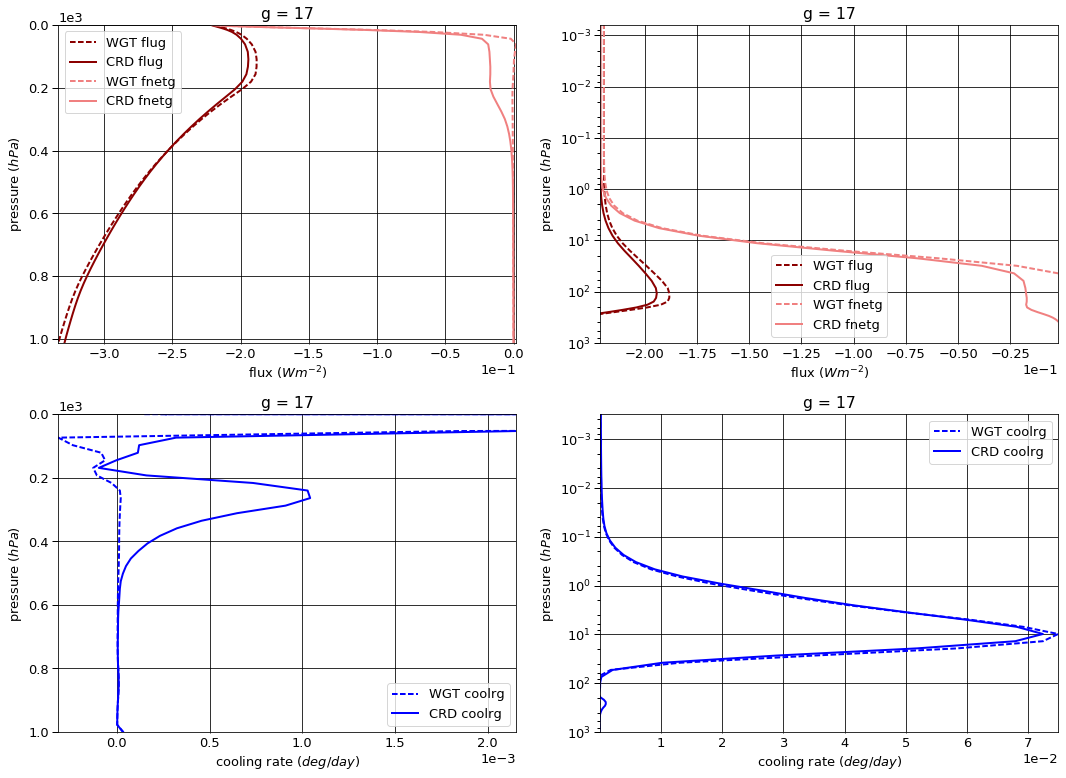

# Figure: flux, cooling rate g-group 18

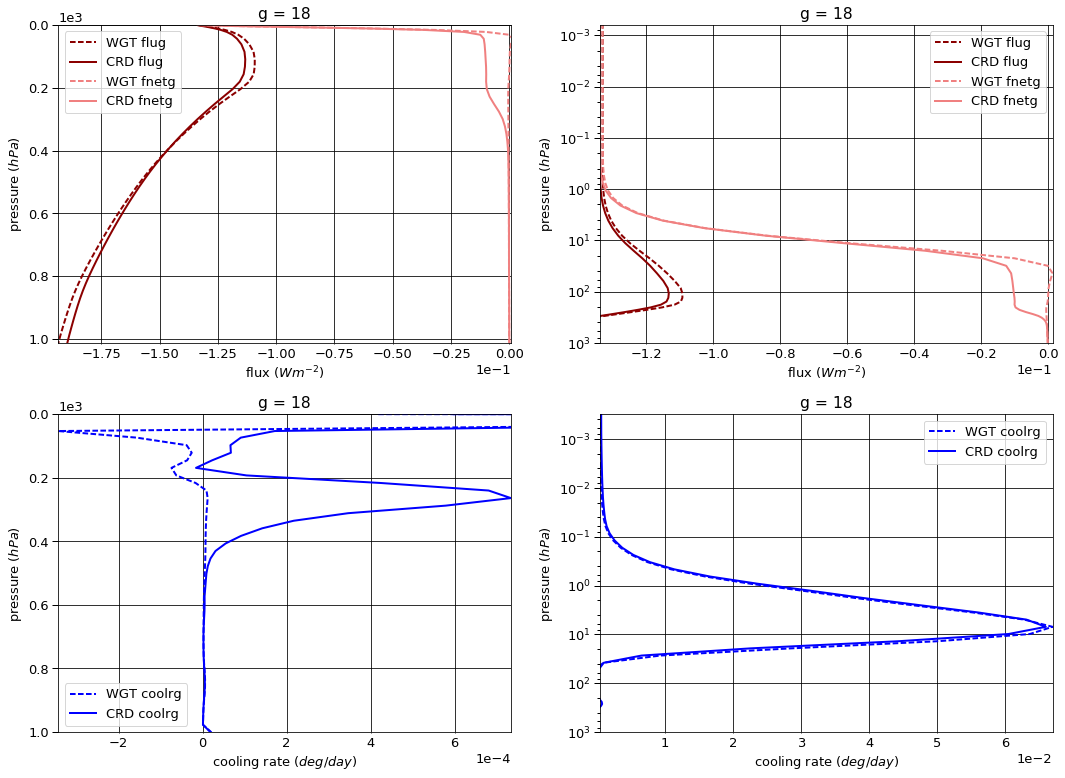

# Figure: flux, cooling rate g-group 19

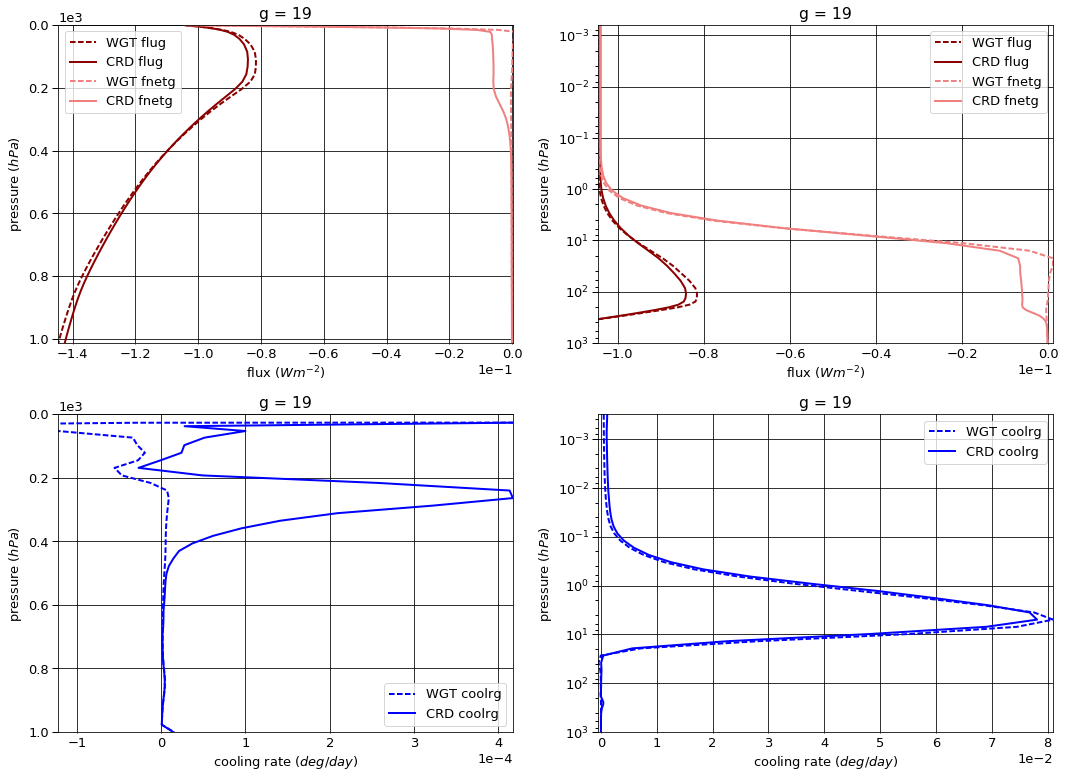

# Figure: flux, cooling rate g-group 20

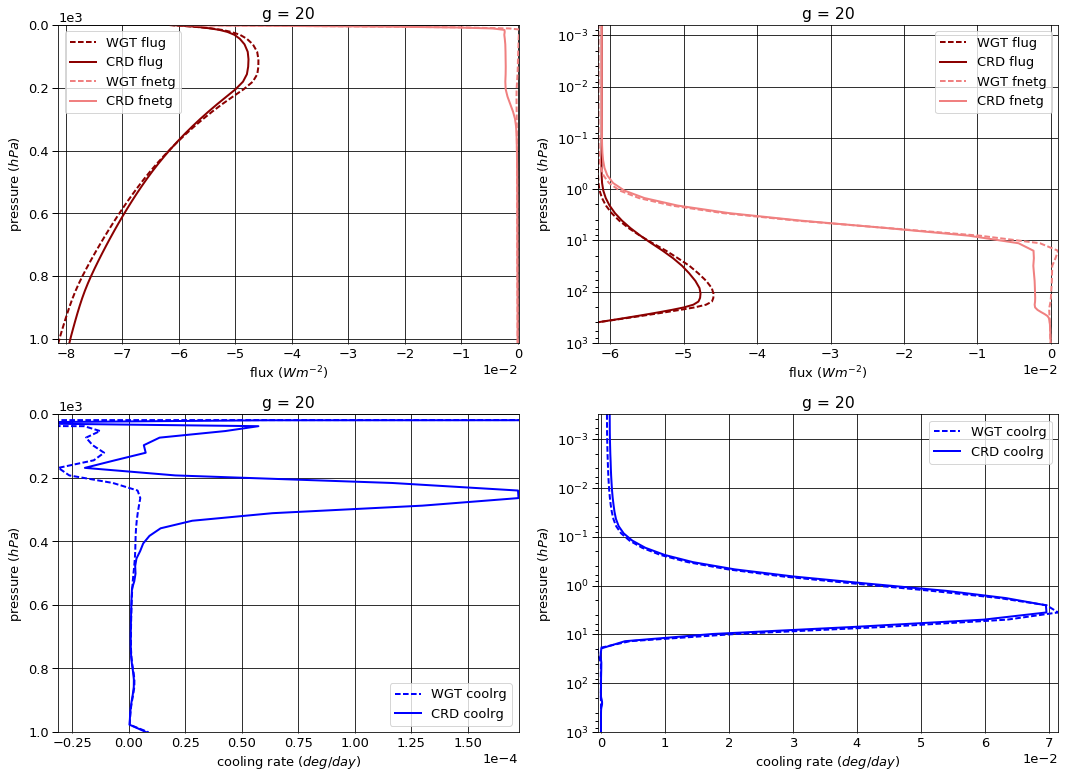

# Figure: flux, cooling rate g-group 21

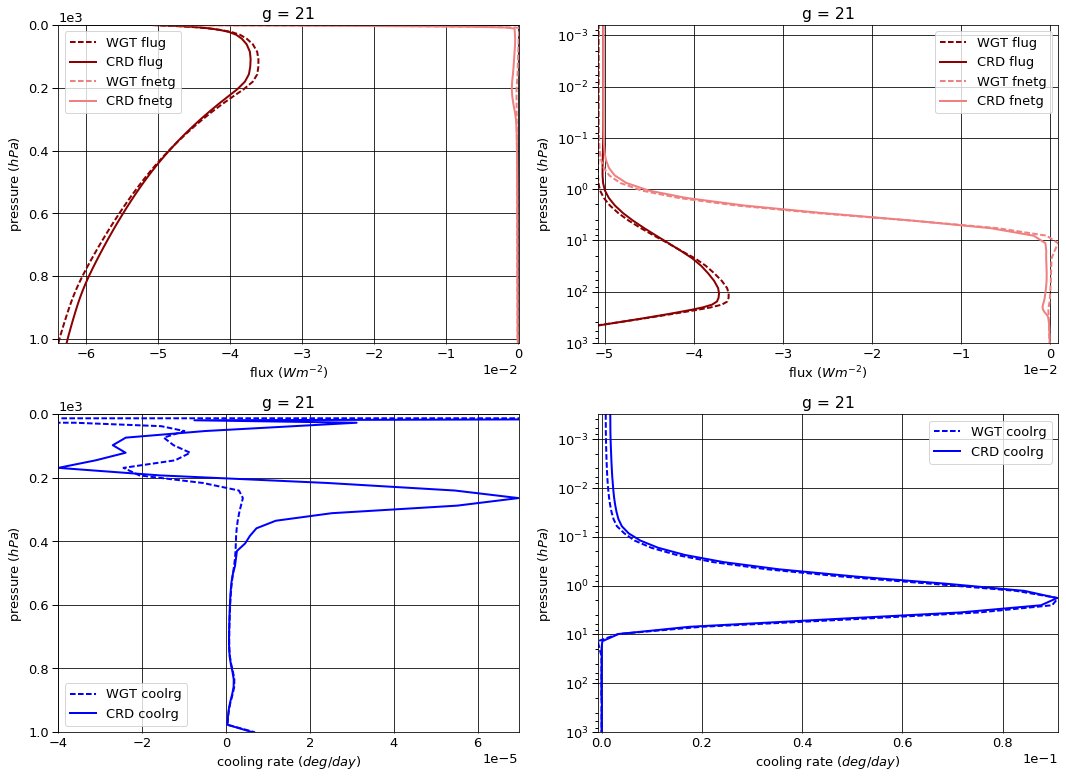

# Figure: flux, cooling rate g-group 22

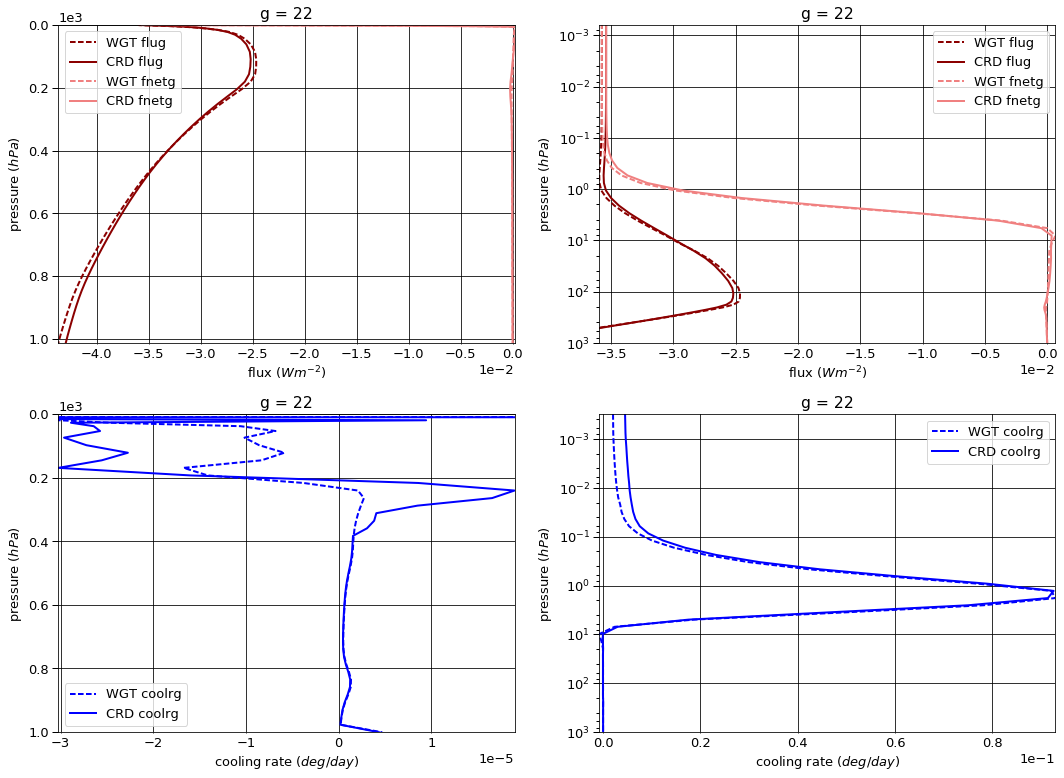

# Figure: flux, cooling rate g-group 23

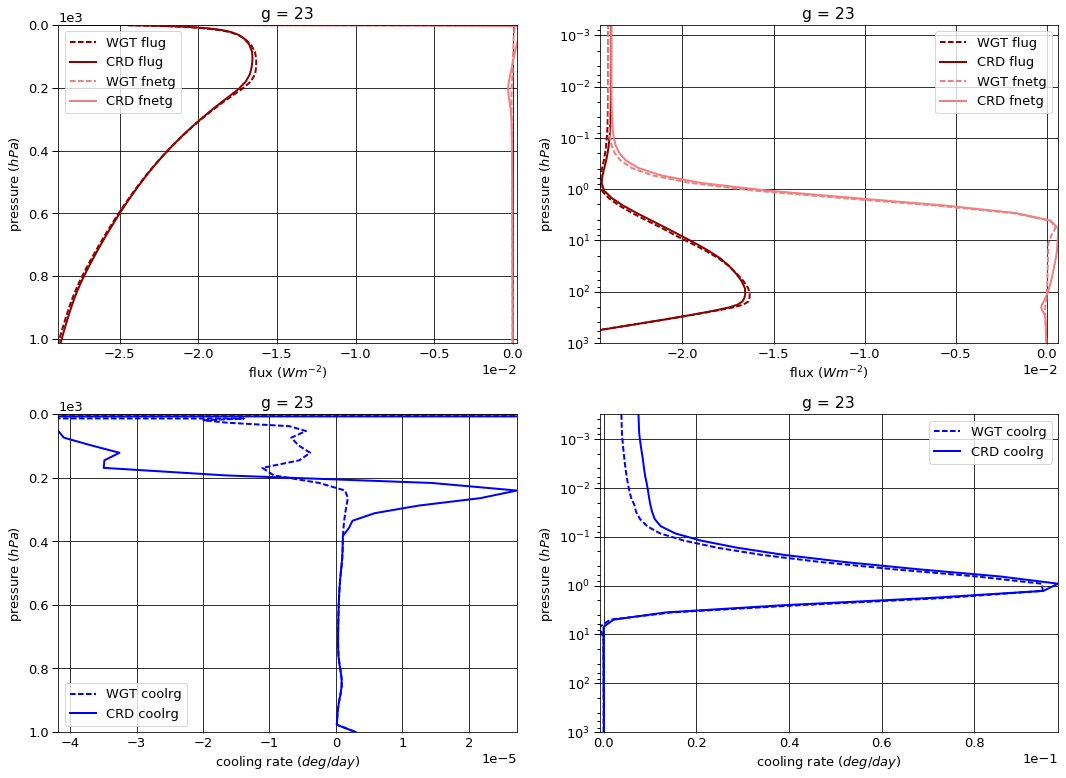

# Figure: flux, cooling rate g-group 24

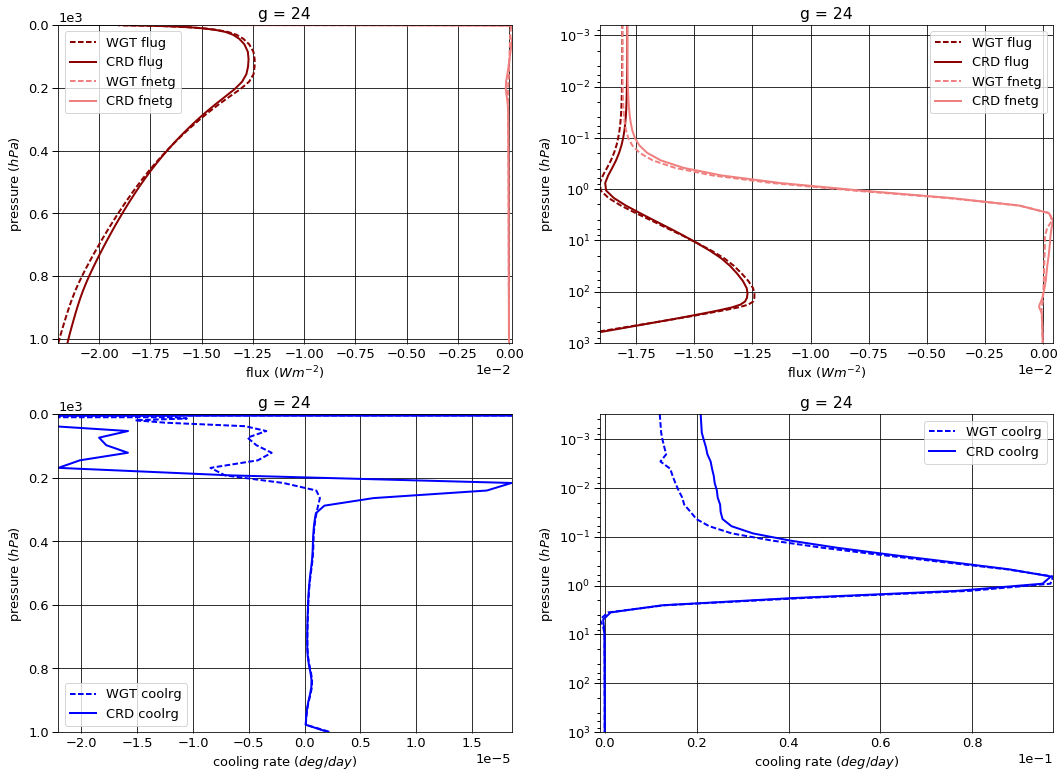

# Figure: flux, cooling rate g-group 25

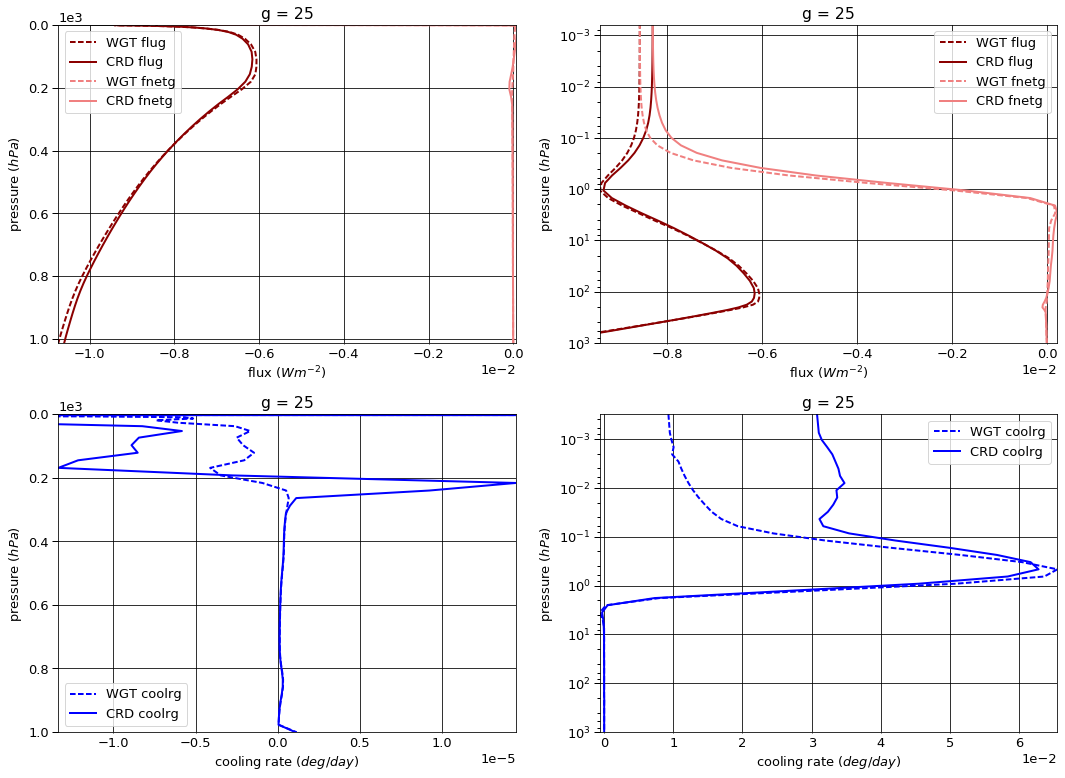

# Figure: flux, cooling rate g-group 26

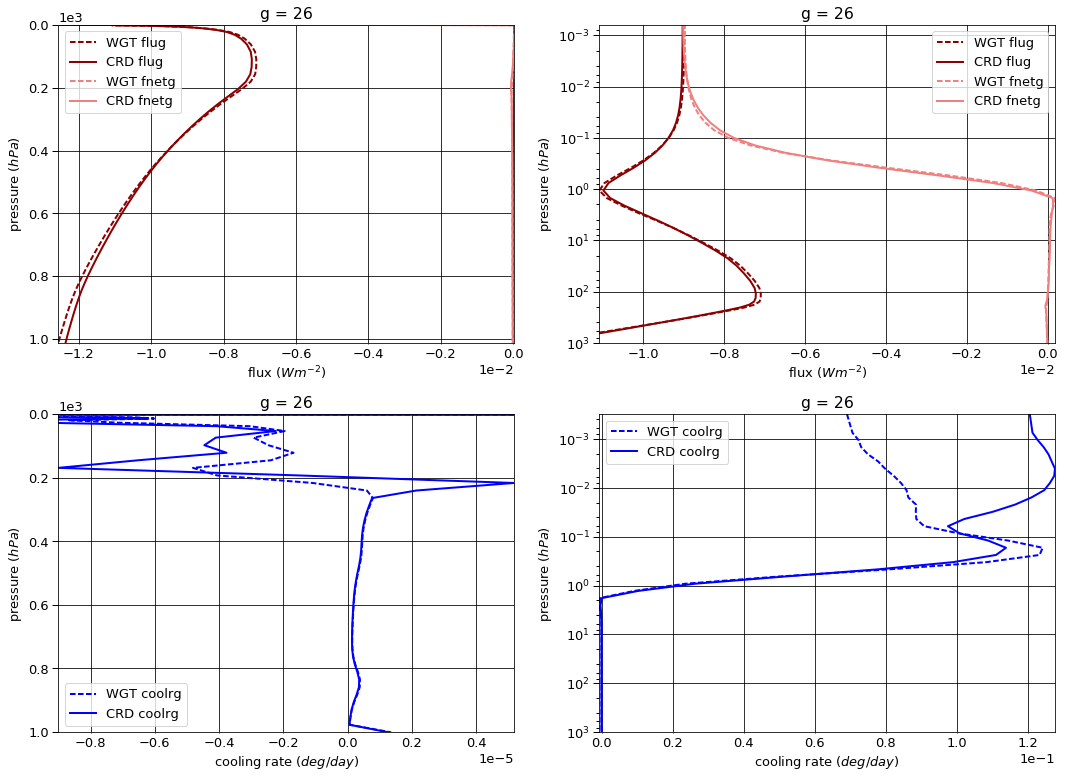

# Figure: flux, cooling rate g-group 27

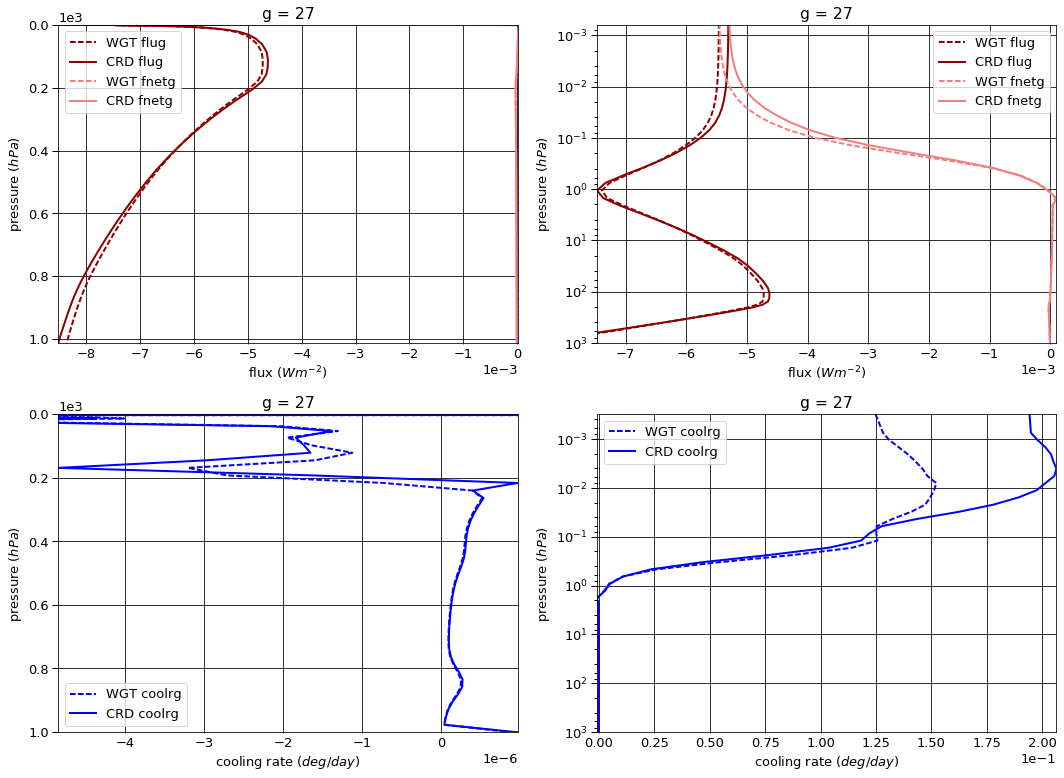

# Figure: flux, cooling rate g-group 28

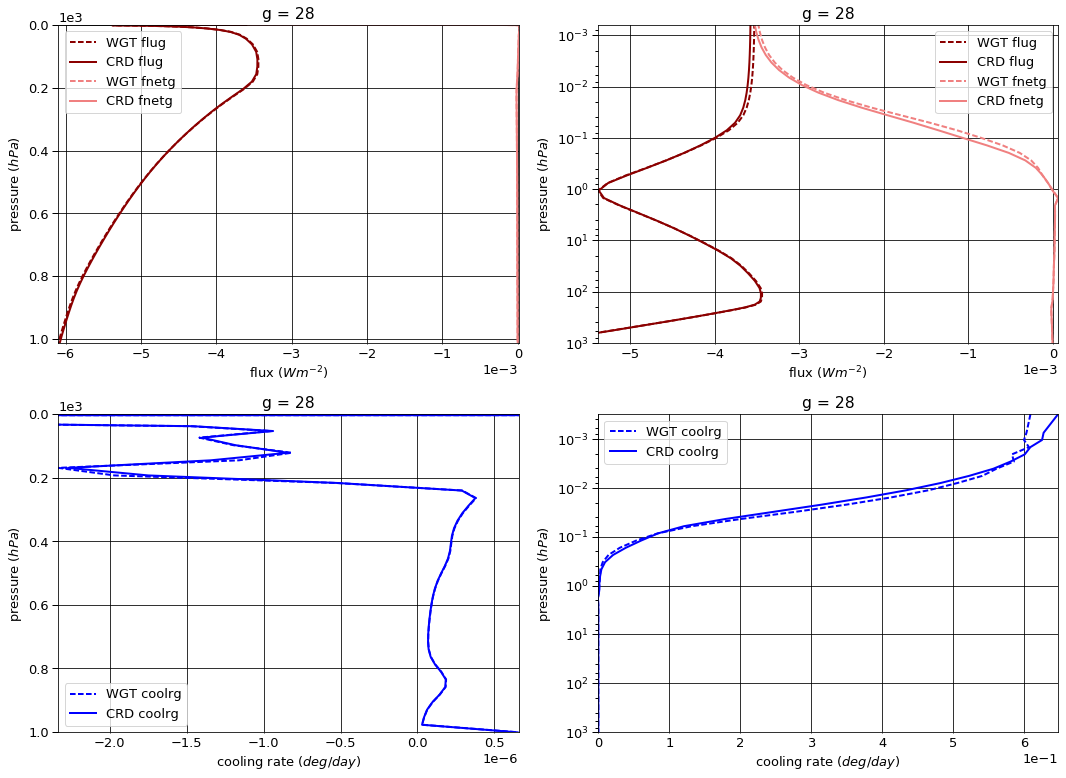

# Figure: flux, cooling rate g-group 29

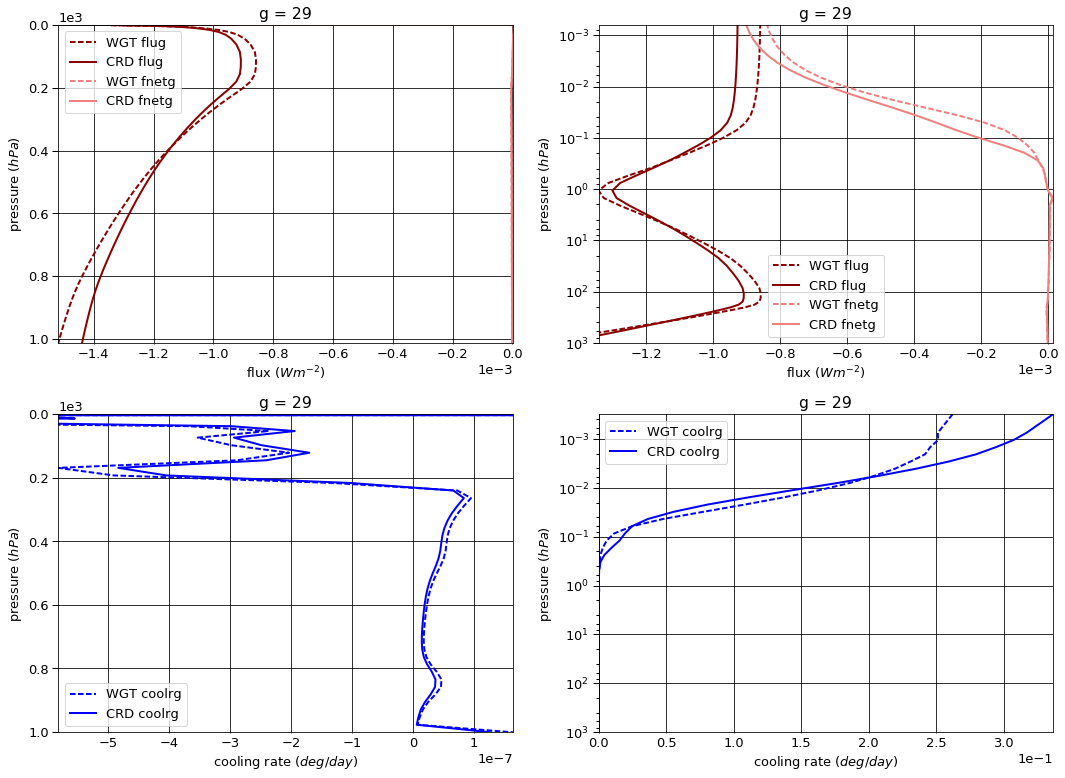

# Figure: flux, cooling rate g-group 30

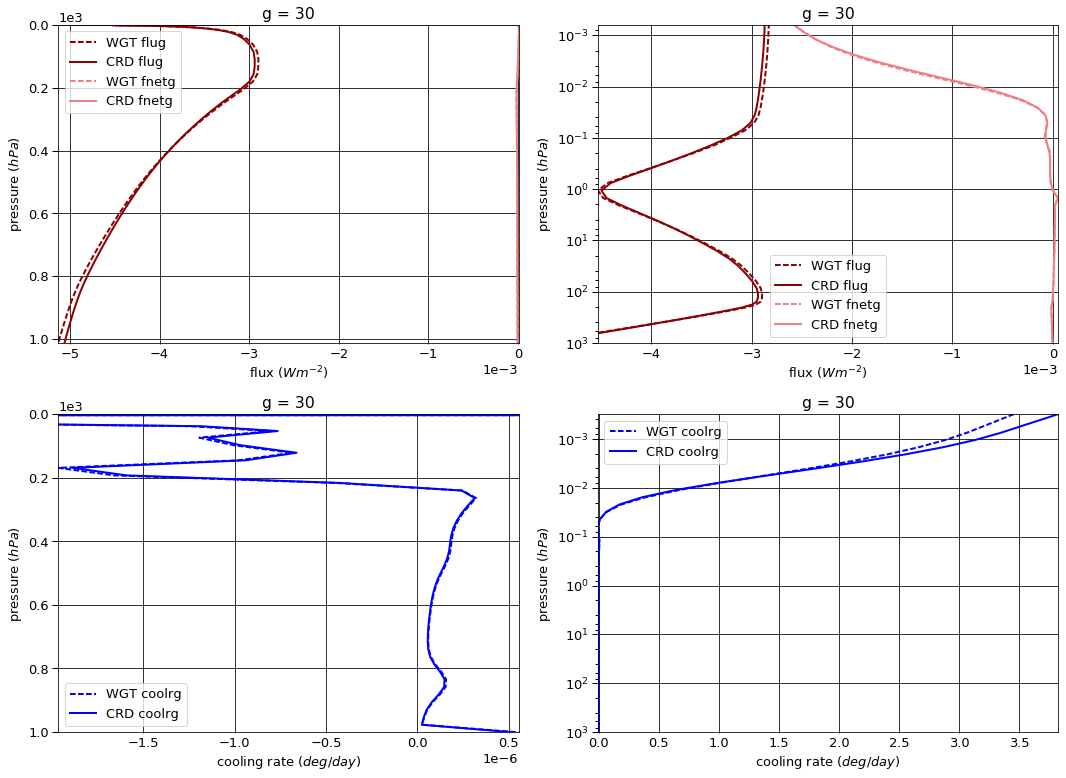

# Figure: flux, cooling rate g-group total

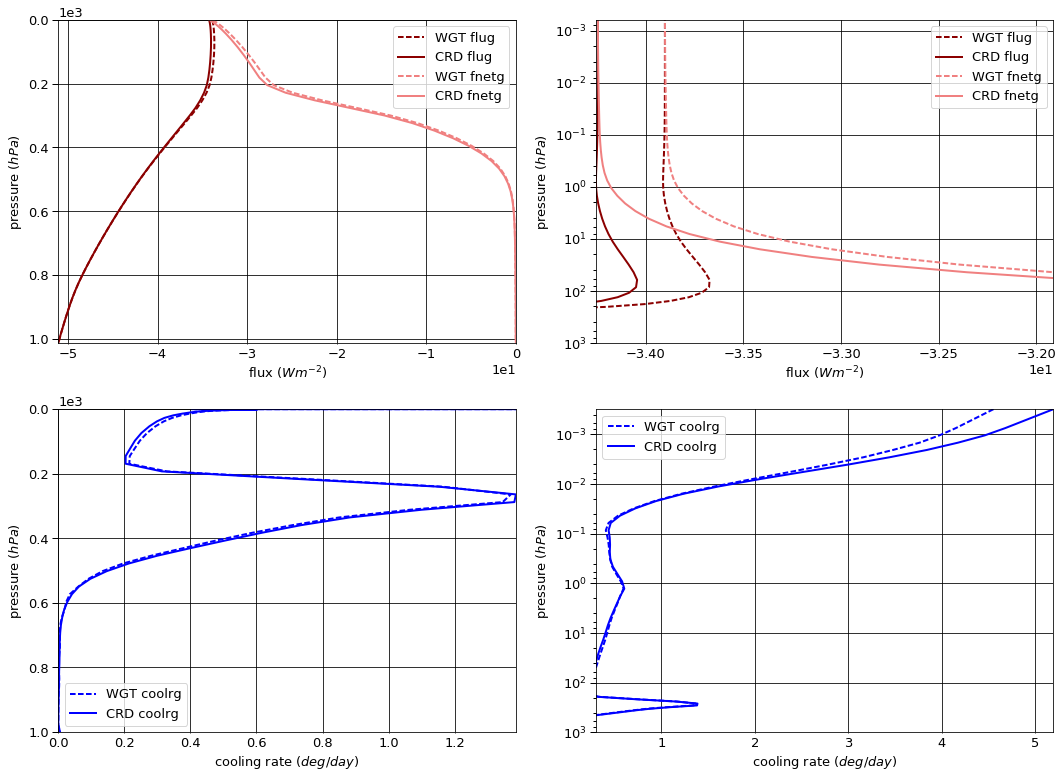

In [16]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [17]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg         fnetg
g  pressure level                                  
1  0.0      1     -0.001021  0.000000 -1.020788e-03
   1013.0   76    -0.001110  0.001103 -7.248249e-06
2  0.0      1     -0.001968  0.000000 -1.967641e-03
   1013.0   76    -0.002204  0.002200 -3.551600e-06
3  0.0      1     -0.014383  0.000000 -1.438332e-02
   1013.0   76    -0.016741  0.016730 -1.112489e-05
4  0.0      1     -3.393883  0.000000 -3.393883e+00
   1013.0   76    -4.702365  4.700762 -1.603220e-03
5  0.0      1     -5.679063  0.000000 -5.679063e+00
   1013.0   76    -8.008606  8.006033 -2.572945e-03
6  0.0      1     -4.704050  0.000000 -4.704050e+00
   1013.0   76    -6.826244  6.824147 -2.097069e-03
7  0.0      1     -4.165361  0.000000 -4.165361e+00
   1013.0   76    -6.151436  6.149634 -1.802310e-03
8  0.0      1     -4.707599  0.000000 -4.707599e+00
   1013.0   76    -7.091387  7.089382 -2.004959e-03
9  0.0      1     -3.390935  0.000000 -3.390935e+00
   1013.0   76    -5.276400  5.274901 -1.499030e-03
10 0.0      1     -2.549043  0.000000 -2.549043e+00
   1013.0   76    -4.049974  4.048829 -1.144175e-03
11 0.0      1     -1.750422  0.000000 -1.750422e+00
   1013.0   76    -2.827201  2.826411 -7.903971e-04
12 0.0      1     -1.176835  0.000000 -1.176835e+00
   1013.0   76    -1.936199  1.935654 -5.454894e-04
13 0.0      1     -0.794401  0.000000 -7.944011e-01
   1013.0   76    -1.300473  1.300109 -3.644427e-04
14 0.0      1     -0.559630  0.000000 -5.596305e-01
   1013.0   76    -0.902909  0.902655 -2.537088e-04
15 0.0      1     -0.379168  0.000000 -3.791678e-01
   1013.0   76    -0.597267  0.597100 -1.674136e-04
16 0.0      1     -0.300117  0.000000 -3.001172e-01
   1013.0   76    -0.459653  0.459523 -1.294364e-04
17 0.0      1     -0.221304  0.000000 -2.213036e-01
   1013.0   76    -0.328921  0.328828 -9.378627e-05
18 0.0      1     -0.133784  0.000000 -1.337841e-01
   1013.0   76    -0.189518  0.189465 -5.284575e-05
19 0.0      1     -0.104065  0.000000 -1.040654e-01
   1013.0   76    -0.142477  0.142436 -4.052088e-05
20 0.0      1     -0.061135  0.000000 -6.113481e-02
   1013.0   76    -0.079404  0.079383 -2.180228e-05
21 0.0      1     -0.050150  0.000000 -5.015033e-02
   1013.0   76    -0.062744  0.062726 -1.760265e-05
22 0.0      1     -0.035393  0.000000 -3.539297e-02
   1013.0   76    -0.042958  0.042946 -1.212542e-05
23 0.0      1     -0.023914  0.000000 -2.391395e-02
   1013.0   76    -0.028745  0.028737 -8.433512e-06
24 0.0      1     -0.017881  0.000000 -1.788067e-02
   1013.0   76    -0.021539  0.021533 -5.995305e-06
25 0.0      1     -0.008305  0.000000 -8.305133e-03
   1013.0   76    -0.010597  0.010594 -3.029511e-06
26 0.0      1     -0.009026  0.000000 -9.025737e-03
   1013.0   76    -0.012368  0.012364 -3.495829e-06
27 0.0      1     -0.005303  0.000000 -5.303407e-03
   1013.0   76    -0.008522  0.008519 -2.693543e-06
28 0.0      1     -0.003576  0.000000 -3.575583e-03
   1013.0   76    -0.006076  0.006075 -1.795553e-06
29 0.0      1     -0.000926  0.000000 -9.256540e-04
   1013.0   76    -0.001439  0.001439 -3.533059e-07
30 0.0      1     -0.002863  0.000000 -2.863082e-03
   1013.0   76    -0.005062  0.005060 -1.442052e-06


WGT


flug      fldg         fnetg
g  pressure level                                  
1  0.0      1     -0.001088  0.000000 -1.087688e-03
   1013.0   76    -0.001254  0.001245 -8.434304e-06
2  0.0      1     -0.002054  0.000000 -2.053890e-03
   1013.0   76    -0.002487  0.002480 -6.566839e-06
3  0.0      1     -0.014655  0.000000 -1.465459e-02
   1013.0   76    -0.018788  0.018767 -2.082639e-05
4  0.0      1     -3.390071  0.000000 -3.390071e+00
   1013.0   76    -4.501738  4.500395 -1.342670e-03
5  0.0      1     -5.670933  0.000000 -5.670933e+00
   1013.0   76    -7.816063  7.813732 -2.331188e-03
6  0.0      1     -4.694115  0.000000 -4.694115e+00
   1013.0   76    -6.762193  6.760176 -2.016865e-03
7  0.0      1     -4.132747  0.000000 -4.132747e+00
   1013.0   76    -6.185029  6.183184 -1.844722e-03
8  0.0      1     -4.643770  0.000000 -4.643770e+00
   1013.0   76    -7.205444  7.203295 -2.149067e-03
9  0.0      1     -3.343506  0.000000 -3.343506e+00
   1013.0   76    -5.353606  5.352009 -1.596745e-03
10 0.0      1     -2.495501  0.000000 -2.495501e+00
   1013.0   76    -4.116402  4.115174 -1.227742e-03
11 0.0      1     -1.702349  0.000000 -1.702349e+00
   1013.0   76    -2.882311  2.881451 -8.596666e-04
12 0.0      1     -1.146548  0.000000 -1.146548e+00
   1013.0   76    -1.969570  1.968983 -5.874362e-04
13 0.0      1     -0.772938  0.000000 -7.729377e-01
   1013.0   76    -1.324911  1.324516 -3.951628e-04
14 0.0      1     -0.546010  0.000000 -5.460100e-01
   1013.0   76    -0.919170  0.918896 -2.741480e-04
15 0.0      1     -0.372016  0.000000 -3.720159e-01
   1013.0   76    -0.608449  0.608268 -1.814737e-04
16 0.0      1     -0.296136  0.000000 -2.961359e-01
   1013.0   76    -0.467602  0.467463 -1.394651e-04
17 0.0      1     -0.219575  0.000000 -2.195749e-01
   1013.0   76    -0.333416  0.333317 -9.944331e-05
18 0.0      1     -0.133005  0.000000 -1.330052e-01
   1013.0   76    -0.193363  0.193306 -5.767176e-05
19 0.0      1     -0.104482  0.000000 -1.044823e-01
   1013.0   76    -0.144527  0.144484 -4.310609e-05
20 0.0      1     -0.061607  0.000000 -6.160728e-02
   1013.0   76    -0.081357  0.081333 -2.426524e-05
21 0.0      1     -0.050654  0.000000 -5.065437e-02
   1013.0   76    -0.063899  0.063880 -1.905823e-05
22 0.0      1     -0.035734  0.000000 -3.573370e-02
   1013.0   76    -0.043671  0.043658 -1.302519e-05
23 0.0      1     -0.024081  0.000000 -2.408071e-02
   1013.0   76    -0.028892  0.028883 -8.617235e-06
24 0.0      1     -0.018095  0.000000 -1.809474e-02
   1013.0   76    -0.021984  0.021978 -6.556971e-06
25 0.0      1     -0.008577  0.000000 -8.576890e-03
   1013.0   76    -0.010736  0.010732 -3.201947e-06
26 0.0      1     -0.008984  0.000000 -8.984479e-03
   1013.0   76    -0.012566  0.012562 -3.747878e-06
27 0.0      1     -0.005461  0.000000 -5.460654e-03
   1013.0   76    -0.008366  0.008364 -2.495284e-06
28 0.0      1     -0.003530  0.000000 -3.530149e-03
   1013.0   76    -0.006095  0.006093 -1.817931e-06
29 0.0      1     -0.000858  0.000000 -8.577664e-04
   1013.0   76    -0.001518  0.001518 -4.528630e-07
30 0.0      1     -0.002823  0.000000 -2.822544e-03
   1013.0   76    -0.005131  0.005129 -1.530294e-06


WGT - CRD


flug      fldg         fnetg
g  pressure level                                  
1  0.0      1     -0.000067  0.000000 -6.689990e-05
   1013.0   76    -0.000144  0.000142 -1.186055e-06
2  0.0      1     -0.000086  0.000000 -8.624880e-05
   1013.0   76    -0.000283  0.000280 -3.015239e-06
3  0.0      1     -0.000271  0.000000 -2.712780e-04
   1013.0   76    -0.002047  0.002038 -9.701499e-06
4  0.0      1      0.003812  0.000000  3.812000e-03
   1013.0   76     0.200627 -0.200367  2.605496e-04
5  0.0      1      0.008129  0.000000  8.129400e-03
   1013.0   76     0.192543 -0.192302  2.417578e-04
6  0.0      1      0.009935  0.000000  9.935100e-03
   1013.0   76     0.064051 -0.063971  8.020410e-05
7  0.0      1      0.032614  0.000000  3.261410e-02
   1013.0   76    -0.033592  0.033550 -4.241160e-05
8  0.0      1      0.063829  0.000000  6.382890e-02
   1013.0   76    -0.114058  0.113914 -1.441080e-04
9  0.0      1      0.047429  0.000000  4.742910e-02
   1013.0   76    -0.077206  0.077108 -9.771550e-05
10 0.0      1      0.053542  0.000000  5.354200e-02
   1013.0   76    -0.066428  0.066345 -8.356640e-05
11 0.0      1      0.048073  0.000000  4.807300e-02
   1013.0   76    -0.055110  0.055041 -6.926943e-05
12 0.0      1      0.030288  0.000000  3.028790e-02
   1013.0   76    -0.033371  0.033329 -4.194678e-05
13 0.0      1      0.021463  0.000000  2.146341e-02
   1013.0   76    -0.024438  0.024407 -3.072010e-05
14 0.0      1      0.013620  0.000000  1.362045e-02
   1013.0   76    -0.016262  0.016241 -2.043926e-05
15 0.0      1      0.007152  0.000000  7.151870e-03
   1013.0   76    -0.011182  0.011168 -1.406003e-05
16 0.0      1      0.003981  0.000000  3.981260e-03
   1013.0   76    -0.007949  0.007939 -1.002871e-05
17 0.0      1      0.001729  0.000000  1.728690e-03
   1013.0   76    -0.004495  0.004489 -5.657042e-06
18 0.0      1      0.000779  0.000000  7.789700e-04
   1013.0   76    -0.003845  0.003841 -4.826011e-06
19 0.0      1     -0.000417  0.000000 -4.169200e-04
   1013.0   76    -0.002050  0.002048 -2.585203e-06
20 0.0      1     -0.000472  0.000000 -4.724710e-04
   1013.0   76    -0.001953  0.001950 -2.462963e-06
21 0.0      1     -0.000504  0.000000 -5.040330e-04
   1013.0   76    -0.001155  0.001154 -1.455580e-06
22 0.0      1     -0.000341  0.000000 -3.407280e-04
   1013.0   76    -0.000713  0.000712 -8.997680e-07
23 0.0      1     -0.000167  0.000000 -1.667560e-04
   1013.0   76    -0.000147  0.000147 -1.837223e-07
24 0.0      1     -0.000214  0.000000 -2.140660e-04
   1013.0   76    -0.000445  0.000445 -5.616661e-07
25 0.0      1     -0.000272  0.000000 -2.717568e-04
   1013.0   76    -0.000138  0.000138 -1.724354e-07
26 0.0      1      0.000041  0.000000  4.125880e-05
   1013.0   76    -0.000198  0.000198 -2.520489e-07
27 0.0      1     -0.000157  0.000000 -1.572465e-04
   1013.0   76     0.000156 -0.000155  1.982588e-07
28 0.0      1      0.000045  0.000000  4.543400e-05
   1013.0   76    -0.000019  0.000019 -2.237850e-08
29 0.0      1      0.000068  0.000000  6.788761e-05
   1013.0   76    -0.000079  0.000079 -9.955703e-08
30 0.0      1      0.000041  0.000000  4.053800e-05
   1013.0   76    -0.000069  0.000069 -8.824200e-08

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1      8.208697e-14
   1001.112500 75     1.637266e-06
2  0.000312    1      2.873044e-13
   1001.112500 75     1.146025e-06
3  0.000312    1      8.827633e-10
   1001.112500 75     4.261127e-06
4  0.000312    1      1.660127e-08
   1001.112500 75     5.799001e-04
5  0.000312    1      5.748302e-08
   1001.112500 75     9.302300e-04
6  0.000312    1      5.361640e-08
   1001.112500 75     7.582388e-04
7  0.000312    1      1.635750e-07
   1001.112500 75     6.517254e-04
8  0.000312    1      1.132969e-07
   1001.112500 75     7.250651e-04
9  0.000312    1      1.014088e-07
   1001.112500 75     5.420984e-04
10 0.000312    1      9.508415e-07
   1001.112500 75     4.137740e-04
11 0.000312    1      2.242780e-06
   1001.112500 75     2.858393e-04
12 0.000312    1      5.393080e-06
   1001.112500 75     1.972687e-04
13 0.000312    1      1.353809e-05
   1001.112500 75     1.317968e-04
14 0.000312    1      2.039217e-05
   1001.112500 75     9.175046e-05
15 0.000312    1      5.084479e-05
   1001.112500 75     6.054352e-05
16 0.000312    1      6.849592e-05
   1001.112500 75     4.681109e-05
17 0.000312    1      2.405056e-04
   1001.112500 75     3.391557e-05
18 0.000312    1      5.982830e-04
   1001.112500 75     1.911122e-05
19 0.000312    1      1.126778e-03
   1001.112500 75     1.465355e-05
20 0.000312    1      1.361927e-03
   1001.112500 75     7.885004e-06
21 0.000312    1      1.737718e-03
   1001.112500 75     6.365826e-06
22 0.000312    1      4.517469e-03
   1001.112500 75     4.384995e-06
23 0.000312    1      7.493247e-03
   1001.112500 75     3.049579e-06
24 0.000312    1      2.087758e-02
   1001.112500 75     2.168190e-06
25 0.000312    1      3.078036e-02
   1001.112500 75     1.095530e-06
26 0.000312    1      1.205439e-01
   1001.112500 75     1.264232e-06
27 0.000312    1      1.942456e-01
   1001.112500 75     9.738194e-07
28 0.000312    1      6.482825e-01
   1001.112500 75     6.492562e-07
29 0.000312    1      3.366405e-01
   1001.112500 75     1.278065e-07
30 0.000312    1      3.824800e+00
   1001.112500 75     5.215011e-07


WGT


coolrg
g  pressure    layer              
1  0.000312    1      1.759007e-14
   1001.112500 75     2.741152e-06
2  0.000312    1      1.524472e-13
   1001.112500 75     2.148097e-06
3  0.000312    1      2.659149e-10
   1001.112500 75     7.965730e-06
4  0.000312    1      1.099947e-08
   1001.112500 75     4.854975e-04
5  0.000312    1      5.589795e-08
   1001.112500 75     8.429364e-04
6  0.000312    1      3.762154e-08
   1001.112500 75     7.292800e-04
7  0.000312    1      9.749418e-08
   1001.112500 75     6.670348e-04
8  0.000312    1      9.929541e-08
   1001.112500 75     7.770832e-04
9  0.000312    1      1.013848e-07
   1001.112500 75     5.773686e-04
10 0.000312    1      7.139567e-07
   1001.112500 75     4.439403e-04
11 0.000312    1      1.529310e-06
   1001.112500 75     3.108476e-04
12 0.000312    1      3.138700e-06
   1001.112500 75     2.124116e-04
13 0.000312    1      8.601233e-06
   1001.112500 75     1.428873e-04
14 0.000312    1      1.067001e-05
   1001.112500 75     9.912944e-05
15 0.000312    1      2.675708e-05
   1001.112500 75     6.561923e-05
16 0.000312    1      4.229904e-05
   1001.112500 75     5.042932e-05
17 0.000312    1      1.479327e-04
   1001.112500 75     3.595780e-05
18 0.000312    1      4.183593e-04
   1001.112500 75     2.085359e-05
19 0.000312    1      5.003004e-04
   1001.112500 75     1.558677e-05
20 0.000312    1      9.345988e-04
   1001.112500 75     8.774093e-06
21 0.000312    1      8.288839e-04
   1001.112500 75     6.891282e-06
22 0.000312    1      2.044584e-03
   1001.112500 75     4.709789e-06
23 0.000312    1      3.808183e-03
   1001.112500 75     3.115914e-06
24 0.000312    1      1.197769e-02
   1001.112500 75     2.370941e-06
25 0.000312    1      9.290354e-03
   1001.112500 75     1.157795e-06
26 0.000312    1      6.908740e-02
   1001.112500 75     1.355199e-06
27 0.000312    1      1.247884e-01
   1001.112500 75     9.022722e-07
28 0.000312    1      6.092827e-01
   1001.112500 75     6.573476e-07
29 0.000312    1      2.621331e-01
   1001.112500 75     1.637511e-07
30 0.000312    1      3.456715e+00
   1001.112500 75     5.533406e-07


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -6.449691e-14
   1001.112500 75     1.103886e-06
2  0.000312    1     -1.348572e-13
   1001.112500 75     1.002072e-06
3  0.000312    1     -6.168484e-10
   1001.112500 75     3.704603e-06
4  0.000312    1     -5.601803e-09
   1001.112500 75    -9.440261e-05
5  0.000312    1     -1.585076e-09
   1001.112500 75    -8.729365e-05
6  0.000312    1     -1.599486e-08
   1001.112500 75    -2.895881e-05
7  0.000312    1     -6.608086e-08
   1001.112500 75     1.530944e-05
8  0.000312    1     -1.400150e-08
   1001.112500 75     5.201807e-05
9  0.000312    1     -2.402000e-11
   1001.112500 75     3.527021e-05
10 0.000312    1     -2.368848e-07
   1001.112500 75     3.016623e-05
11 0.000312    1     -7.134703e-07
   1001.112500 75     2.500837e-05
12 0.000312    1     -2.254380e-06
   1001.112500 75     1.514291e-05
13 0.000312    1     -4.936852e-06
   1001.112500 75     1.109048e-05
14 0.000312    1     -9.722161e-06
   1001.112500 75     7.378979e-06
15 0.000312    1     -2.408771e-05
   1001.112500 75     5.075708e-06
16 0.000312    1     -2.619687e-05
   1001.112500 75     3.618229e-06
17 0.000312    1     -9.257298e-05
   1001.112500 75     2.042226e-06
18 0.000312    1     -1.799237e-04
   1001.112500 75     1.742364e-06
19 0.000312    1     -6.264773e-04
   1001.112500 75     9.332220e-07
20 0.000312    1     -4.273283e-04
   1001.112500 75     8.890890e-07
21 0.000312    1     -9.088340e-04
   1001.112500 75     5.254557e-07
22 0.000312    1     -2.472885e-03
   1001.112500 75     3.247942e-07
23 0.000312    1     -3.685065e-03
   1001.112500 75     6.633520e-08
24 0.000312    1     -8.899892e-03
   1001.112500 75     2.027513e-07
25 0.000312    1     -2.149000e-02
   1001.112500 75     6.226510e-08
26 0.000312    1     -5.145648e-02
   1001.112500 75     9.096720e-08
27 0.000312    1     -6.945713e-02
   1001.112500 75    -7.154719e-08
28 0.000312    1     -3.899981e-02
   1001.112500 75     8.091410e-09
29 0.000312    1     -7.450741e-02
   1001.112500 75     3.594464e-08
30 0.000312    1     -3.680846e-01
   1001.112500 75     3.183951e-08

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-34.245503,0.000000,-34.245503
1013.0,76,-51.090539,51.075277,-0.015262



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-33.901900,0.000000,-33.901900
1013.0,76,-51.090539,51.075272,-0.015267



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,3.436029e-01,0.000000,0.343603
1013.0,76,1.503000e-07,-0.000005,-0.000005


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,5.193409
1001.112500,75,0.005518



WGT


,,coolrg
pressure,layer,
0.000312,1,4.552052
1001.112500,75,0.005520



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.641357
1001.112500,75,0.000002


In [18]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.003727,0.000025
2,0.005409,0.000049
3,0.013136,0.000368
4,0.063500,0.088113
5,0.106894,0.152985
6,0.118652,0.132357
7,0.121727,0.121060
8,0.155818,0.141033
9,0.112394,0.104787


In [19]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,0.000000e+00
2,2.610843e-23
3,5.705625e-23
4,1.246883e-22
5,2.724885e-22
6,5.954849e-22
7,1.301347e-21
8,2.843909e-21
9,6.214958e-21


In [20]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')